### Chapter 7

# 순전파 및 역전파

> ## 학습 목표
-   **순전파의 개념 이해** : 신경망에서 순전파가 어떻게 이루어지는지 설명하고, 입력 데이터가 출력으로 변환되는 과정을 단계별로 이해할 수 있다.
    
-   **역전파의 원리 이해** : 역전파(backpropagation)의 기본 원리와 기울기 계산 과정을 이해하고, 손실 함수의 기울기를 통해 네트워크 파라미터를 업데이트하는 방법을 설명할 수 있다.
    
-   **순전파와 역전파 연결 이해** : 순전파와 역전파가 신경망 학습 과정에서 어떻게 상호작용하는지를 이해하고, 두 과정의 역할을 명확히 구분할 수 있다.
    
-   **파이토치에서의 구현** : 파이토치를 사용하여 순전파와 역전파 과정이 포함된 신경망 모델을 구현하고, 이를 통해 학습 과정을 시뮬레이션할 수 있다.

### **`순전파(Forward Propagation) & 역전파(Backward Propagation)`**

### ■ 순전파(Forward Propagation)

순전파는 **입력 데이터를 신경망의 각 계층을 거쳐 출력 값으로 변환**하는 과정입니다.

1.  **목적**:
    
    -   모델이 입력 데이터를 받아 예측 결과를 생성하는 과정입니다.
    -   손실(loss)을 계산하기 위해 예측 값을 생성합니다.
2.  **작동 방식**:
    
    -   입력 데이터가 첫 번째 계층(입력 계층)에서 시작해 네트워크의 각 계층(은닉 계층 및 출력 계층)을 통과합니다.
    -   각 계층에서 `가중치(weight)와 편향(bias)`이 적용되고, 활성화 함수(activation function)가 적용되어 출력값을 계산합니다.
    -   마지막 출력 계층에서 결과값(예: 분류 확률)이 도출됩니다.

3.  **결과**:
    
    -   네트워크의 최종 출력 값과 실제 값 간의 오차(손실)를 계산합니다.
    -   손실 함수(loss function)가 사용됩니다(예: MSE, Cross-Entropy 등).


### ■ 역전파(Backward Propagation)

역전파는 **손실을 기반으로 네트워크의 가중치와 편향을 업데이트하기 위해 기울기(gradient)를 계산하는 과정**입니다.

1.  **목적**:
    
    -   손실 함수의 값을 최소화하기 위해 가중치와 편향을 조정합니다.
    -   네트워크가 학습하도록 합니다.

2.  **작동 방식**:
    
    -   손실 함수로부터 시작해 네트워크의 마지막 계층에서 첫 번째 계층(입력 계층) 방향으로 거꾸로 진행됩니다.
    -   각 계층에서 `기울기(gradient)`를 계산하여 가중치와 편향의 변화량(업데이트 방향)을 결정합니다.
    -   체인 룰(chain rule)을 사용해 각 계층의 기울기를 계산합니다.

3.  **가중치 업데이트**:
    
    -   경사하강법(Gradient Descent) 등을 사용해 가중치를 업데이트합니다.

4.  **결과**:
    
    -   네트워크의 가중치와 편향이 업데이트되며, 모델의 성능이 점진적으로 개선됩니다.

## 7.1 순전파(Forward Propagation)

### 순전파

- 입력 데이터가 네트워크에 들어가면 각 층에서 순차적으로 연산이 이루어집니다.
- 각 뉴런은 입력값에 가중치를 곱하고 그 결과를 활성화 함수에 통과시켜 출력을 생성합니다.
- 이 과정은 네트워크의 각 층을 차례로 지나면서 최종 출력값을 얻는 과정입니다.
- 파이토치에서 순전파는 forward() 메서드를 사용하여 구현됩니다.

- **순전파 단계**
  - 입력층 : 네트워크에 입력 데이터가 들어옵니다.
  - 은닉층 : 입력 데이터는 가중치(weight)와 편향(bias)을 곱한 후 활성화 함수(activation function)를 거쳐 은닉층의 출력으로 변환됩니다.
  - 출력층 : 은닉층의 출력값은 다시 가중치와 편향을 거쳐 최종 출력값을 생성합니다.
  - 손실 계산 : 네트워크의 출력값과 실제 정답값을 비교하여 손실(loss)을 계산합니다.

### 순전파 구현

In [1]:
import torch
import torch.nn as nn

# 1. 신경망 모델 정의
class SimpleNN(nn.Module):   # nn.Module을 상속하여 신경망 모델을 정의
    def __init__(self):      # __init__ 는 신경망의 레이어를 정의
        super(SimpleNN, self).__init__()
        # 입력층 1, 은닉층 10, 출력층 1
        self.fc1 = nn.Linear(1, 10)  # 입력층에서 은닉층
        self.fc2 = nn.Linear(10, 1)  # 은닉층에서 출력층
    # 순전파 구현
    def forward(self, x):
        # 첫 번째 층에 대해 ReLU 활성화 함수 적용
        x = torch.relu(self.fc1(x))
        # 두 번째 층 (출력층)
        x = self.fc2(x)
        return x

# 2. 모델 초기화
model = SimpleNN()

# 3. 임의의 입력 데이터 생성 (배치 크기 3, 입력 크기 1)
input_data = torch.tensor([[1.0], [2.0], [3.0]])

# 4. 순전파 실행
# model(input_data)를 호출하여 입력 데이터를 모델에 통과시켜 출력값을 계산
output_data = model(input_data)

# 5. 출력 확인
print("입력 데이터:\n", input_data)
print("모델 출력:\n", output_data)

입력 데이터:
 tensor([[1.],
        [2.],
        [3.]])
모델 출력:
 tensor([[ 0.1388],
        [-0.0268],
        [-0.1374]], grad_fn=<AddmmBackward0>)


## 7.2 역전파(Backward Propagation)

- 역전파는 순전파 후 계산된 손실을 기반으로 가중치와 편향을 업데이트하는 과정입니다. 
- **경사 하강법(Gradient Descent)** 을 이용하여 수행됩니다.

- 역전파 단계
- 출력층에서 오차 계산: 출력층에서 네트워크의 예측값과 실제값 간의 차이를 계산합니다. 손실함수를 통해 오차를 구합니다.
- 오차의 미분값 계산: 오차를 이용해 가중치를 조정할 수 있도록 오차를 역으로 전파합니다.
  - 출력층에서부터 각 층으로 오차의 기울기를 계산합니다. 
  - 체인 룰(Chain Rule)을 사용하여 각 층의 가중치가 오차에 미친 영향을 계산합니다.
  - 체인 룰은 복합 함수의 미분을 계산하는 방법으로, 신경망에서 각 층의 미분값을 곱하여 오차를 전파하는 데 사용됩니다.
- 가중치와 편향 업데이트: 계산된 기울기를 사용하여 가중치와 편향을 업데이트합니다.

## 역전파 구현

- 2개의 클래스를 가진 이진 분류 문제 
- 손실함수는 CrossEntropyLoss

## ` 적용 실습` 

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim

In [3]:
# 데이터 준비 X: 입력, y: 목표 출력
X = torch.tensor([[0.0, 0.0],
                  [0.0, 1.0],
                  [1.0, 0.0],
                  [1.0, 1.0]], dtype=torch.float32)

y = torch.tensor([0, 1, 1, 0], dtype=torch.long)  # XOR 문제 (레이블 0과 1)


In [4]:
# 신경망 클래스 정의
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(2, 2)  # 입력층 → 은닉층 (2개 뉴런)
        self.fc2 = nn.Linear(2, 2)  # 은닉층 → 출력층 (2개 클래스)

    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))  # 은닉층에서 시그모이드 활성화 함수
        x = self.fc2(x)  # 출력층은 CrossEntropyLoss 사용
        return x

# 모델 초기화
model = SimpleNN()

In [5]:
# 손실 함수: CrossEntropyLoss (소프트맥스 포함)
criterion = nn.CrossEntropyLoss()

# 옵티마이저: 경사 하강법 (SGD)
optimizer = optim.SGD(model.parameters(), lr=0.1)

# 학습 과정 (순전파, 역전파, 가중치 업데이트)
epochs = 10000
for epoch in range(epochs): # 1000번 에폭 반복
    # 순전파: 입력 데이터를 모델에 통과시켜 예측값을 얻음
    output = model(X)

    # 손실 계산
    loss = criterion(output, y) 

    # 역전파
    optimizer.zero_grad()  # 기울기 초기화
    loss.backward()  # 기울기 계산
    optimizer.step()  # 가중치 업데이트

    # 1000번마다 손실 출력
    if epoch % 1000 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

Epoch 0, Loss: 0.6933592557907104
Epoch 1000, Loss: 0.6931595802307129
Epoch 2000, Loss: 0.693047285079956
Epoch 3000, Loss: 0.6927794814109802
Epoch 4000, Loss: 0.6913584470748901
Epoch 5000, Loss: 0.6745681762695312
Epoch 6000, Loss: 0.5764949917793274
Epoch 7000, Loss: 0.447142094373703
Epoch 8000, Loss: 0.17314265668392181
Epoch 9000, Loss: 0.07353422790765762


In [6]:
# 학습한 모델에서 최종 예측
with torch.no_grad(): # 기울기 계산 비활성화
    output = model(X)
    predicted = torch.argmax(output, dim=1) # 샘플에 대해 가장 높은 확률을 가진 클래스 예측
    print("last prediction:", predicted.numpy())  # x에 대한 레이블 y값 예측

last prediction: [0 1 1 0]


**1. 신경망 정의 (SimpleNN)**

  - fc1은 첫 번째 선형층(입력층 → 은닉층)입니다.
  - fc2는 두 번째 선형층(은닉층 → 출력층)입니다.
  - forward 함수는 순전파를 정의합니다. 입력을 은닉층에 통과시키고, 활성화 함수로 시그모이드를 적용한 후 출력층으로 전달합니다.

**2. 모델 초기화** : 모델을 인스턴스화하고, 손실 함수와 최적화 방법을 설정합니다.

**3. 훈련 과정**

  - outputs = model(inputs)로 순전파가 이루어집니다.
  - loss = criterion(outputs, targets)로 출력값과 실제 값 간의 손실을 계산합니다.
  - loss.backward()로 역전파를 통해 기울기를 계산하고, optimizer.step()으로 가중치를 업데이트합니다.

### `데이터셋 load_breast_cancer 이용한 모델 만들기`

- load_breast_cancer 데이터셋은 scikit-learn 라이브러리에서 제공하는 유방암(Breast Cancer) 진단에 관한 데이터셋입니다. 

**Breast Cancer Wisconsin (Diagnostic) Dataset**은 유방암 종양의 양성과 악성을 진단하는 데 사용되는 데이터셋으로, 1995년에 공개되었습니다. 
 
이 데이터셋은 사이킷런(sklearn)의 데이터셋 모듈에서도 제공되며, 머신러닝 연구 및 교육 목적으로 널리 사용됩니다.


### 1\. **데이터셋 소개**

-   **출처**: UCI Machine Learning Repository
-   **목적**: 유방암 종양의 진단(양성 또는 악성) 예측
-   **크기**:
    -   **샘플 수**: 569개
    -   **특성 수**: 30개 (수치형)
    -   **클래스 수**: 2개 (양성 `B: Benign`, 악성 `M: Malignant`)


### 2\. **특성 정보**

데이터셋은 유방암 종양 세포의 핵 특징을 기반으로 합니다. 30개의 수치형 특성은 다음과 같은 10가지 측정 지표의 평균값, 표준편차, 최댓값을 포함합니다:

1.  **Radius**: 핵의 반지름(거리 중심-경계)
2.  **Texture**: 그레이스케일의 표준편차
3.  **Perimeter**: 경계 길이
4.  **Area**: 핵 면적
5.  **Smoothness**: 경계의 매끄러움
6.  **Compactness**: 주변 면적 대비 둘레^2
7.  **Concavity**: 경계의 오목한 부분의 정도
8.  **Concave points**: 경계의 오목한 지점 수
9.  **Symmetry**: 대칭성
10.  **Fractal dimension**: 경계의 복잡성

각 지표별로:

-   `_mean`: 평균값
-   `_se`: 표준 오차
-   `_worst`: 최댓값  
    이렇게 3가지의 값이 제공됩니다. 따라서 총 10 × 3 = 30개의 특성이 생성됩니다.


### 3\. **클래스 정보**

-   **M (Malignant)**: 악성 (212개 샘플, 약 37%)
-   **B (Benign)**: 양성 (357개 샘플, 약 63%)

In [7]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [8]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [9]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [11]:
# 1. 데이터셋 로딩
data = load_breast_cancer()
X = data.data
y = data.target
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

**사이킷런에서의 데이터셋**

- 사이킷런에서 load_breast_cancer를 사용하여 쉽게 접근할 수 있습니다.

In [12]:
# 특성과 레이블
X = data.data  # 입력 특성
y = data.target  # 타겟 (0: 악성, 1: 양성)

# 특성 이름과 타겟 이름
print(data.feature_names)
print(data.target_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
['malignant' 'benign']


In [13]:
# 2. 데이터프레임 생성
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y
df.tail()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [14]:
# 데이터 크기와 기본 통계

# 데이터프레임으로 변환
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# 데이터 개요
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

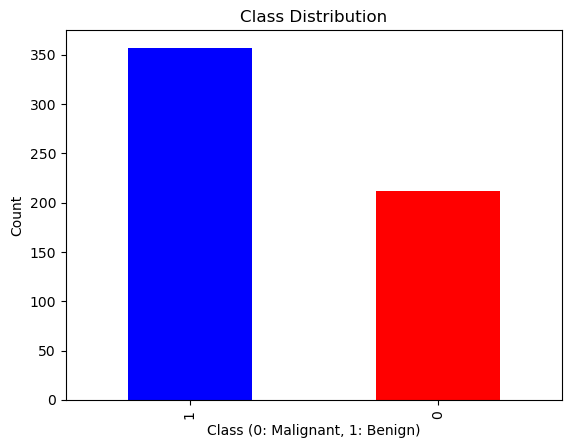

In [15]:
# 클래스 분포 확인

import matplotlib.pyplot as plt

# 클래스 분포 시각화
df['target'].value_counts().plot(kind='bar', color=['blue', 'RED'])
plt.title('Class Distribution')
plt.xlabel('Class (0: Malignant, 1: Benign)')
plt.ylabel('Count')
plt.show()

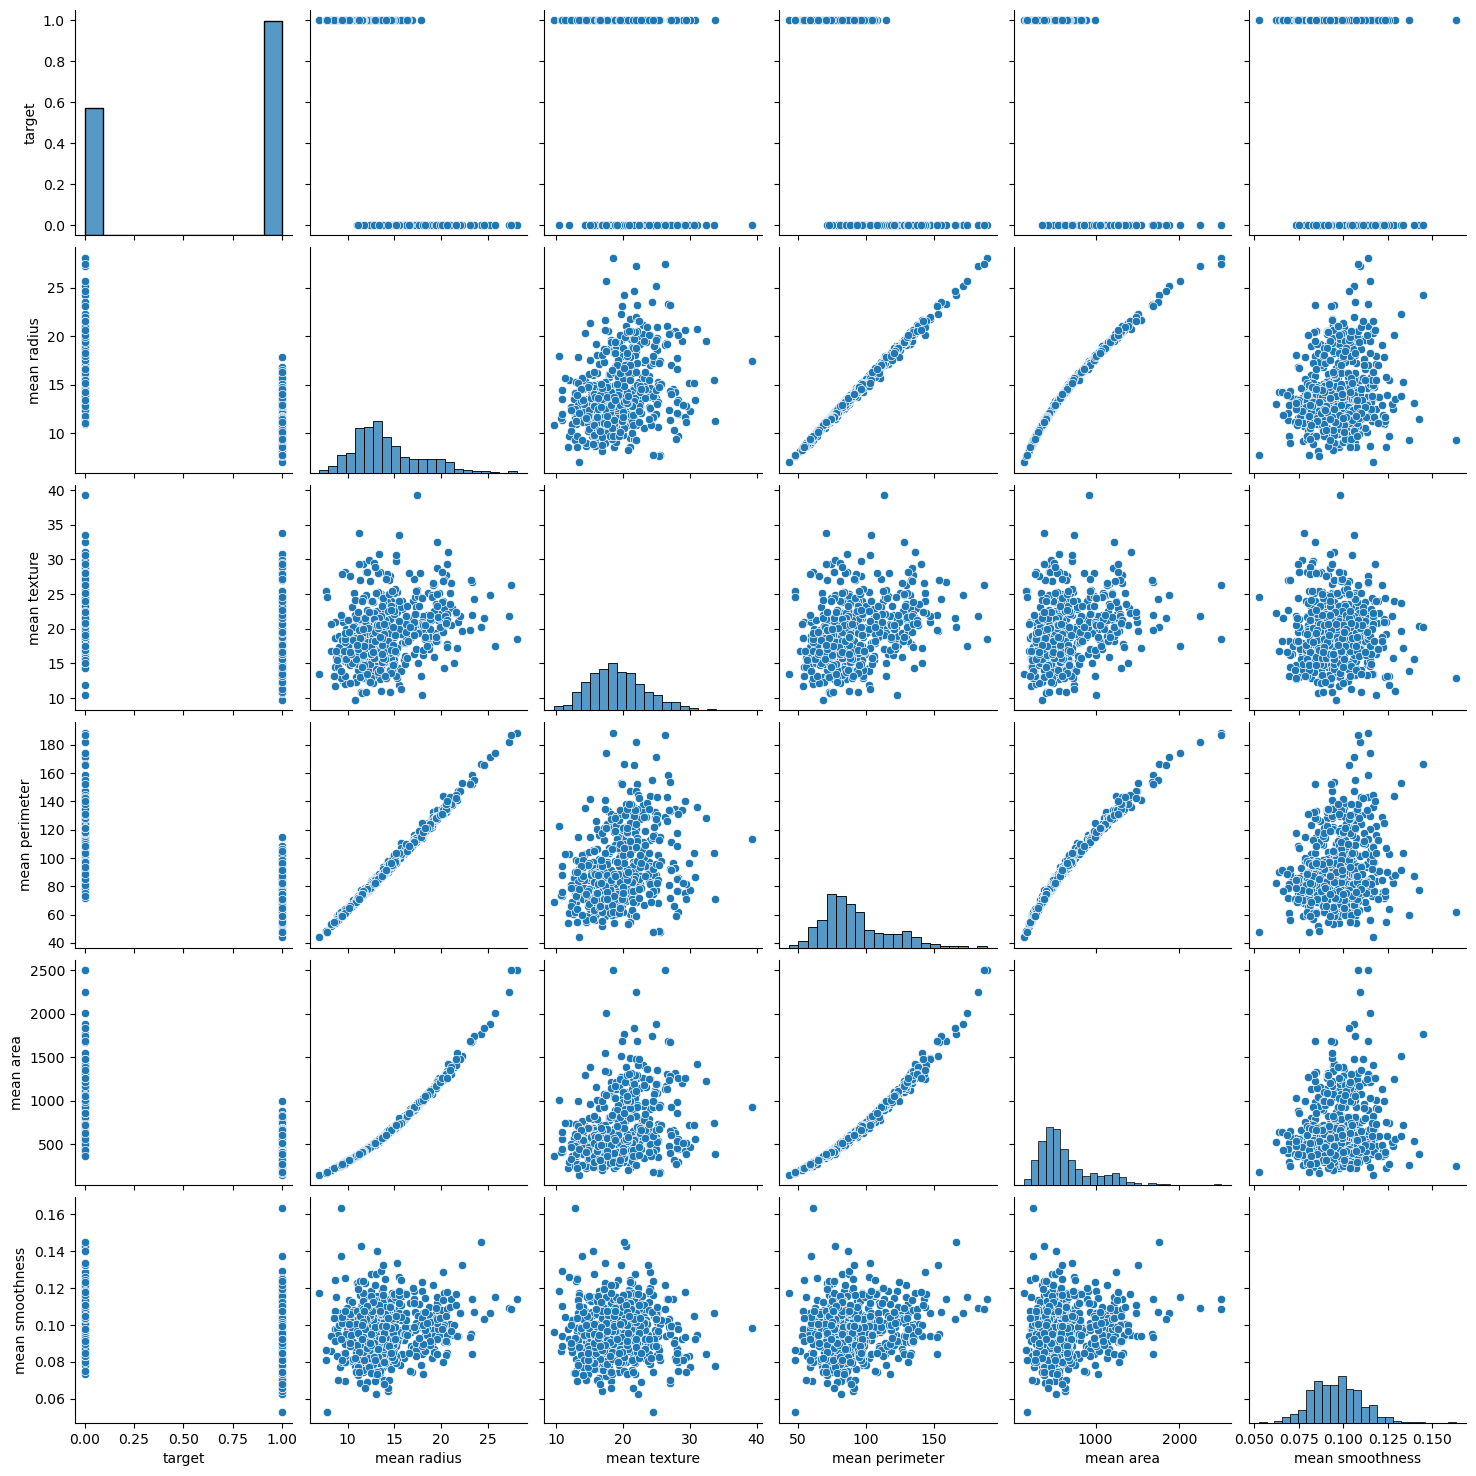

In [16]:
# 샘플 몇 개만 확인
sns.pairplot(df[['target'] + list(df.columns[:5])])
plt.show()

In [17]:
# 3. 데이터 전처리 (훈련/테스트 데이터 분리 및 정규화)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 표준화: StandardScaler를 사용하여 데이터 정규화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 데이터를 파이토치 텐서로 변환
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# 4. 신경망 모델 정의
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(30, 64)  # 30개의 입력 특성
        self.fc2 = nn.Linear(64, 32)  # 중간층
        self.fc3 = nn.Linear(32, 1)   # 출력층
        self.sigmoid = nn.Sigmoid()   # 이진 분류를 위한 시그모이드 활성화 함수

    def forward(self, x):
        x = torch.relu(self.fc1(x))  # 첫 번째 층: ReLU 활성화
        x = torch.relu(self.fc2(x))  # 두 번째 층: ReLU 활성화
        x = self.fc3(x)              # 출력층
        x = self.sigmoid(x)          # 시그모이드 활성화
        return x

# 5. 모델 초기화
model = SimpleNN()
criterion = nn.BCELoss()  # 이진 분류 문제이므로 BCELoss 사용
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 6. 학습
epochs = 100
for epoch in range(epochs):
    # 순전파
    output = model(X_train_tensor)
    
    # 손실 계산
    loss = criterion(output, y_train_tensor)
    
    # 역전파
    optimizer.zero_grad()  # 기울기 초기화
    loss.backward()        # 기울기 계산
    optimizer.step()       # 파라미터 업데이트
    
    # 10번마다 손실 값 출력
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# 7. 테스트
with torch.no_grad():
    # 모델 예측
    output = model(X_test_tensor)
    predicted = (output > 0.5).float()  # 0.5를 기준으로 이진 분류
    
    # 정확도 계산
    accuracy = accuracy_score(y_test, predicted.numpy())
    print(f'Accuracy on test set: {accuracy * 100:.2f}%')

Epoch [10/100], Loss: 0.6104
Epoch [20/100], Loss: 0.4763
Epoch [30/100], Loss: 0.3333
Epoch [40/100], Loss: 0.2216
Epoch [50/100], Loss: 0.1538
Epoch [60/100], Loss: 0.1151
Epoch [70/100], Loss: 0.0928
Epoch [80/100], Loss: 0.0792
Epoch [90/100], Loss: 0.0699
Epoch [100/100], Loss: 0.0629
Accuracy on test set: 96.49%


In [18]:
# 데이터 분할

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# 분류 모델 훈련

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# 모델 생성 및 학습
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 예측 및 평가
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9649122807017544
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



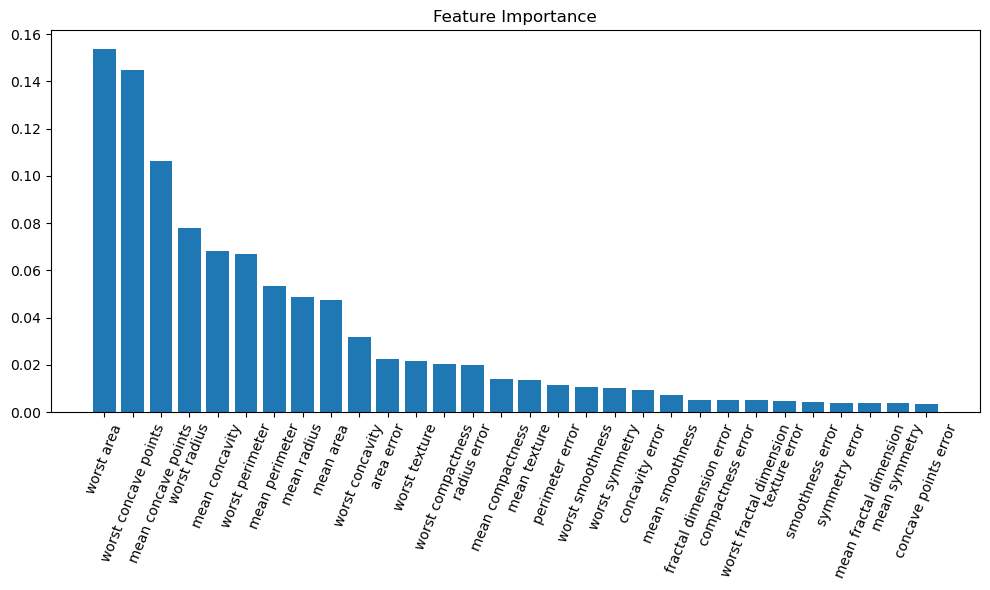

In [20]:
# 랜덤 포레스트를 사용한 특성 중요도 시각화:

import matplotlib.pyplot as plt
import numpy as np

# 특성 중요도 추출
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# 시각화
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), data.feature_names[indices], rotation=68)
plt.tight_layout()
plt.show()

## **데이터셋의 활용**
- 머신러닝 및 딥러닝 기법의 학습과 실험
- 분류 문제 연구 및 알고리즘 비교
- 특성 선택 및 중요도 분석


※ Breast Cancer Wisconsin (Diagnostic) Dataset은 크기가 작아 초급자와 전문가 모두에게 적합하며, 다양한 머신러닝 알고리즘의 성능 비교에 자주 사용됩니다.